Было признаков: 2
The optimal number of neighbors  is 15
Mean squared error: 0.34


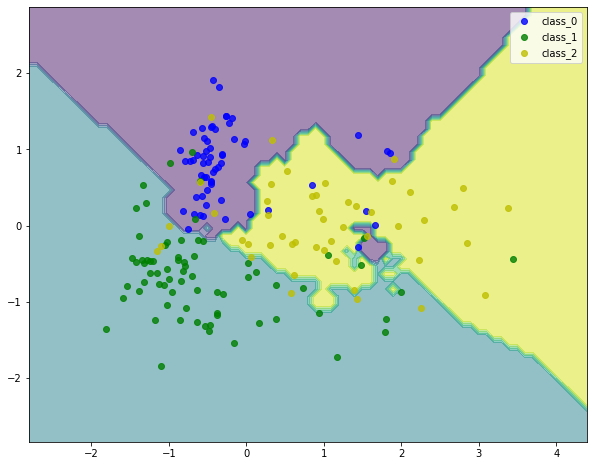

Было признаков: 3
The optimal number of neighbors  is 15
Mean squared error: 0.31


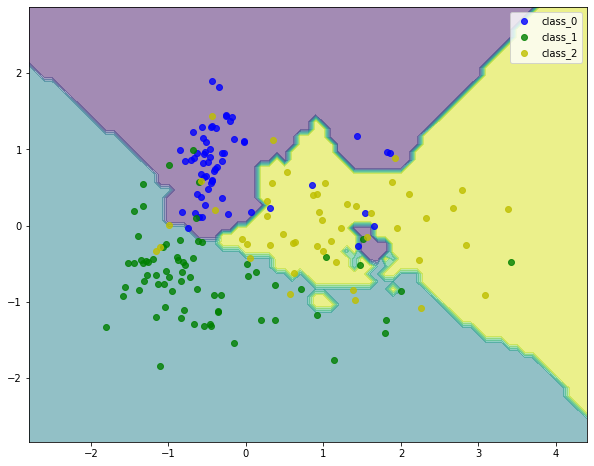

Было признаков: 4
The optimal number of neighbors  is 15
Mean squared error: 0.29


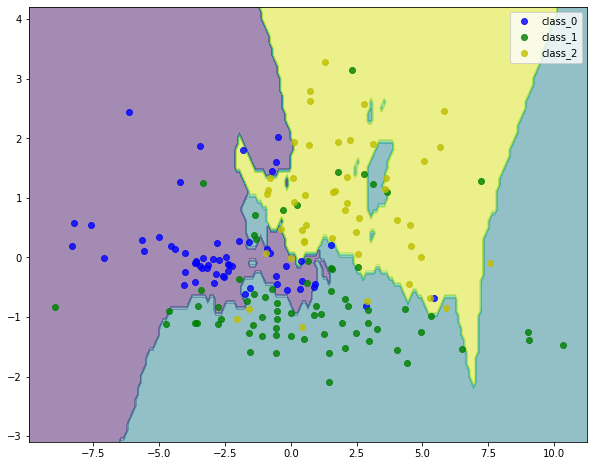

Было признаков: 5
The optimal number of neighbors  is 15
Mean squared error: 0.46


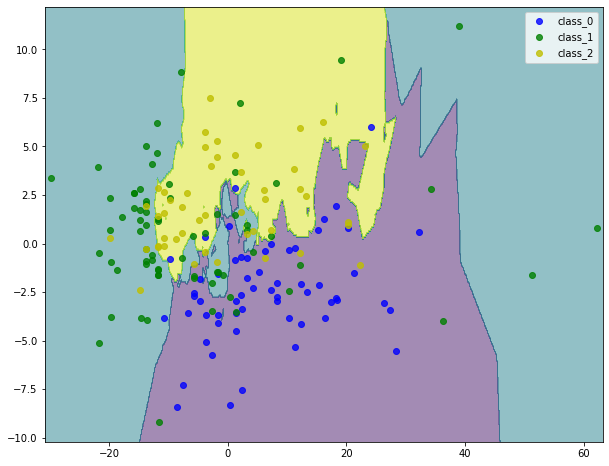

Было признаков: 6
The optimal number of neighbors  is 15
Mean squared error: 0.42


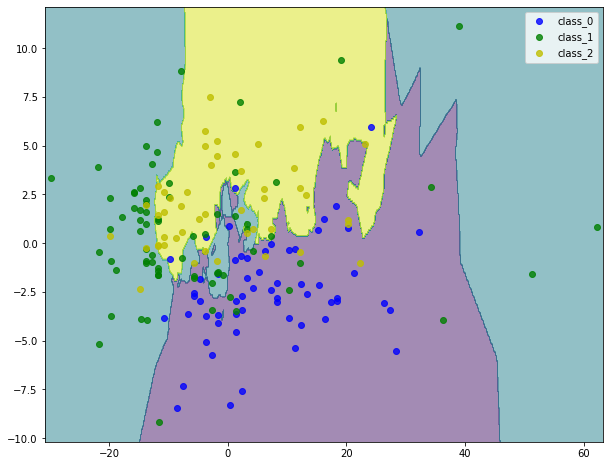

Было признаков: 7
The optimal number of neighbors  is 15
Mean squared error: 0.40


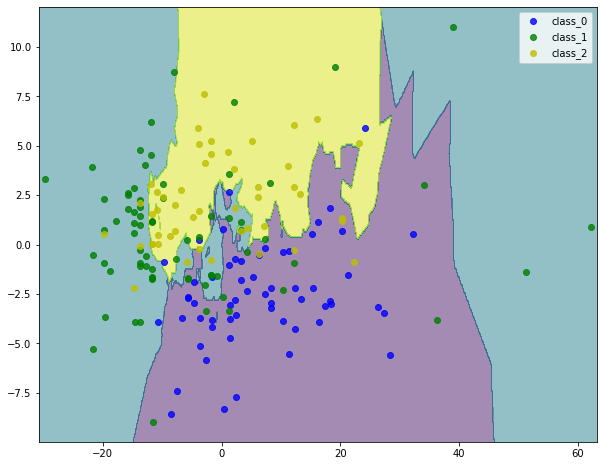

Было признаков: 8
The optimal number of neighbors  is 15
Mean squared error: 0.40


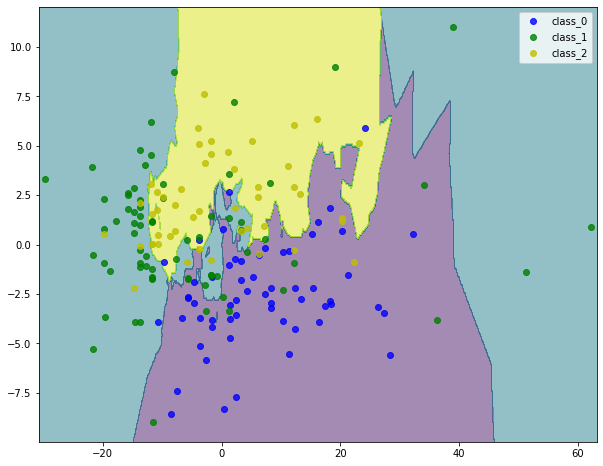

Было признаков: 9
The optimal number of neighbors  is 15
Mean squared error: 0.40


In [ ]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_predict , GridSearchCV, RepeatedStratifiedKFold , cross_val_score
from sklearn import neighbors, datasets
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

kValues = list(range(1,25))
wine = datasets.load_wine()

y = wine.target
for ii in range(2,13):
    X = wine.data[:, :ii]
    pca = PCA(n_components=2)
    X = pca.fit_transform(X)


    colors = "bgy"
    
    target_names=wine.target_names


    # determining the best k
    print("Было признаков: "+str(ii))

    print("The optimal number of neighbors  is 15" )



    kNN = neighbors.KNeighborsClassifier(n_neighbors = 15)
    kNN.fit(X, y)
    y_pred = kNN.predict(X)
    print("Mean squared error: %.2f"
          % mean_squared_error(y, y_pred))


    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))


    plt.subplots( figsize=(10, 8))
    clf=kNN

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5)
    for color, i ,  target_name in zip(colors,[0, 1, 2], target_names):
        plt.scatter(X[y==i, 0], X[y==i, 1], alpha=.8, color=color,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)




    plt.show()